# Comparison with Di Teodoro & Fratelli 2014

This notebook does a cursory comparison between our results and inclinations reported in Di Teodoro & Fratelli 2014.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import h5py


In [ ]:
# bring in our data
flexdata = pd.read_hdf('FLEX_measurements.h5', key='galaxies')
flexdata = pd.read_hdf('FLEX_measurements.h5', key='galaxies')
print('SGA-flex data model version ',h5py.File('FLEX_measurements.h5', 'r')['galaxies'].attrs['data_version'])
sgadata = pd.read_hdf('SGA_galaxy_data.h5', key='galaxies')
data = pd.merge(flexdata, sgadata, on='GALAXY', suffixes=('_flex', '_sga'))

In [3]:
# bring in the Di Teodoro & Fratelli 2014 data
DF14 = pd.read_csv('DiTeodoroFratelli2014.txt', sep='\s+', comment='#')
DF14.columns = ['UGC','OtherName','D_Mpc','R25_arcmin','R25_kpc','i_deg','v_sys_kms','w20_kms','MHI_1e9Msun','Mbar_1e9Msun','SFR_Msunperyr','MdotHI_Msunperyr']
print(DF14['UGC'].size)


146


In [4]:
# match up galaxies and build comparison dataframe

compdf = pd.DataFrame()
for ugc in DF14['UGC']:
    try:
        minidf = data[data['GALAXY']==ugc]
        print(ugc,minidf['GALAXY'].values[0],np.round(minidf['eta_r'].values[0],2),minidf['quality_flag'].values[0],DF14[DF14['UGC']==ugc]['i_deg'].values[0])
        #minidf['i_deg_DF14'] = DF14[DF14['UGC']==ugc]['i_deg'].values[0]
        #minidf['D_Mpc_DF14'] = DF14[DF14['UGC']==ugc]['D_Mpc'].values[0]
        mask = DF14['UGC']==ugc
        idx = minidf.index[0]
        minidf.loc[idx, 'D_Mpc_DF14'] = DF14.loc[mask, 'D_Mpc'].iloc[0]
        minidf.loc[idx, 'i_deg_DF14'] = DF14.loc[mask, 'i_deg'].iloc[0]
        compdf = pd.concat([compdf, minidf])
    except:
        try:
            ngc = DF14[DF14['UGC']==ugc]['OtherName'].values[0]
            #print(ngc)
            minidf = data[data['GALAXY']==ngc]
            print(ugc,minidf['GALAXY'].values[0],np.round(minidf['eta_r'].values[0],2),minidf['quality_flag'].values[0],DF14[DF14['UGC']==ugc]['i_deg'].values[0])
            mask = DF14['UGC']==ugc
            idx = minidf.index[0]
            minidf.loc[idx, 'D_Mpc_DF14'] = DF14.loc[mask, 'D_Mpc'].iloc[0]
            minidf.loc[idx, 'i_deg_DF14'] = DF14.loc[mask, 'i_deg'].iloc[0]
            compdf = pd.concat([compdf, minidf])
        except:
            continue
            print(ugc)




UGC00094 NGC0026 0.21 0 47
UGC00485 UGC00485 1.06 2 83
UGC00624 NGC0338 0.39 0 68
UGC00798 IC1654 0.22 0 40
UGC01856 UGC01856 1.32 4 81
UGC02082

/var/folders/6w/dlp9742d17v7x08hrlbn3d0r0000gn/T/ipykernel_7469/1220157189.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  minidf.loc[idx, 'D_Mpc_DF14'] = DF14.loc[mask, 'D_Mpc'].iloc[0]
/var/folders/6w/dlp9742d17v7x08hrlbn3d0r0000gn/T/ipykernel_7469/1220157189.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  minidf.loc[idx, 'i_deg_DF14'] = DF14.loc[mask, 'i_deg'].iloc[0]
/var/folders/6w/dlp9742d17v7x08hrlbn3d0r0000gn/T/ipykernel_7469/1220157189.py:12: SettingWithCopyWarning: 
A value is trying to 

 UGC02082 0.74 1 79
UGC03574 UGC03574 0.17 0 30
UGC03580 UGC03580 0.27 1 57
UGC03759 NGC2347 0.33 0 44
UGC04036 NGC2441 0.28 0 24
UGC04165 NGC2500 1.06 7 25
UGC04256 NGC2532 0.18 0 34
UGC04273 NGC2543 0.3 0 62
UGC04284 NGC2541 0.35 0 59
UGC04458 NGC2599 0.06 0 32
UGC04605 NGC2654 0.51 0 78
UGC04666 NGC2685 0.41 1 58
UGC04838 NGC2776 0.08 0 65
UGC04862 NGC2782 0.19 0 42
UGC05060 NGC2893 0.19 0 36
UGC05253 NGC2985 0.16 0 36
UGC05351 NGC3067 0.56 0 71
UGC05452 NGC3118 0.56 2 78
UGC05459 UGC05459 1.11 6 79
UGC05532 NGC3147 0.18 0 29
UGC05589 NGC3206 0.31 0 59
UGC05786 NGC3310 0.06 0 40


/var/folders/6w/dlp9742d17v7x08hrlbn3d0r0000gn/T/ipykernel_7469/1220157189.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  minidf.loc[idx, 'D_Mpc_DF14'] = DF14.loc[mask, 'D_Mpc'].iloc[0]
/var/folders/6w/dlp9742d17v7x08hrlbn3d0r0000gn/T/ipykernel_7469/1220157189.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  minidf.loc[idx, 'i_deg_DF14'] = DF14.loc[mask, 'i_deg'].iloc[0]
/var/folders/6w/dlp9742d17v7x08hrlbn3d0r0000gn/T/ipykernel_7469/1220157189.py:12: SettingWithCopyWarning: 
A value is trying to 

UGC05789 NGC3319 0.62 3 61
UGC05906 NGC3380 0.24 0 27
UGC05909 NGC3381 0.41 0 26
UGC05997 NGC3403 0.56 0 68
UGC06128 NGC3512 0.12 0 29
UGC06225 NGC3556 0.84 0 65
UGC06537 NGC3726 0.38 0 47
UGC06884 NGC3963 0.2 0 27
UGC06930 UGC06930 0.21 0 42
UGC07030 NGC4051 0.5 4 40
UGC07095 NGC4100 0.68 0 74
UGC07222 NGC4183 0.83 1 81
UGC07256 NGC4203 0.09 0 65


/var/folders/6w/dlp9742d17v7x08hrlbn3d0r0000gn/T/ipykernel_7469/1220157189.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  minidf.loc[idx, 'D_Mpc_DF14'] = DF14.loc[mask, 'D_Mpc'].iloc[0]
/var/folders/6w/dlp9742d17v7x08hrlbn3d0r0000gn/T/ipykernel_7469/1220157189.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  minidf.loc[idx, 'i_deg_DF14'] = DF14.loc[mask, 'i_deg'].iloc[0]
/var/folders/6w/dlp9742d17v7x08hrlbn3d0r0000gn/T/ipykernel_7469/1220157189.py:23: SettingWithCopyWarning: 
A value is trying to 

UGC07483 NGC4359 0.73 0 53
UGC07489 NGC4369 0.34 0 17
UGC07506 NGC4384 0.26 0 39
UGC07766 NGC4559 0.52 0 63
UGC07989 NGC4725 0.2 0 45
UGC08307 NGC5033 0.38 0 65
UGC08403 NGC5112 0.42 0 52
UGC08699 NGC5289 0.26 1 72
UGC08711 NGC5301 0.75 0 78
UGC08863 NGC5377 0.36 0 67
UGC09366 NGC5676 0.38 0 63
UGC09431 NGC5714 1.46 7 80
UGC09644 UGC09644 0.23 0 20
UGC09753 NGC5879 0.49 0 68
UGC09858 UGC09858 0.67 3 78
UGC09969 NGC5985 0.36 0 60
UGC10359 NGC6140 0.35 0 44
UGC10445 UGC10445 0.27 0 45


/var/folders/6w/dlp9742d17v7x08hrlbn3d0r0000gn/T/ipykernel_7469/1220157189.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  minidf.loc[idx, 'D_Mpc_DF14'] = DF14.loc[mask, 'D_Mpc'].iloc[0]
/var/folders/6w/dlp9742d17v7x08hrlbn3d0r0000gn/T/ipykernel_7469/1220157189.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  minidf.loc[idx, 'i_deg_DF14'] = DF14.loc[mask, 'i_deg'].iloc[0]
/var/folders/6w/dlp9742d17v7x08hrlbn3d0r0000gn/T/ipykernel_7469/1220157189.py:23: SettingWithCopyWarning: 
A value is trying to 

UGC10448 NGC6186 0.35 0 41
UGC10470 NGC6217 0.27 4 34
UGC10497 UGC10497 0.39 0 65
UGC10564 NGC6237 0.47 0 52
UGC11124 UGC11124 1.2 7 26
UGC11269 NGC6667 0.38 0 56
UGC11283 IC1291 0.81 4 35
UGC11994 UGC11994 0.84 6 82
UGC12693 UGC12693 0.84 0 78
UGC12732 UGC12732 0.85 1 28
UGC12754 NGC7741 0.52 1 49
UGC12808 NGC7769 0.1 0 68


/var/folders/6w/dlp9742d17v7x08hrlbn3d0r0000gn/T/ipykernel_7469/1220157189.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  minidf.loc[idx, 'D_Mpc_DF14'] = DF14.loc[mask, 'D_Mpc'].iloc[0]
/var/folders/6w/dlp9742d17v7x08hrlbn3d0r0000gn/T/ipykernel_7469/1220157189.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  minidf.loc[idx, 'i_deg_DF14'] = DF14.loc[mask, 'i_deg'].iloc[0]
/var/folders/6w/dlp9742d17v7x08hrlbn3d0r0000gn/T/ipykernel_7469/1220157189.py:23: SettingWithCopyWarning: 
A value is trying to 

In [5]:
compdf.keys()

Index(['GALAXY', 'GROUP_RA_flex', 'GROUP_DEC_flex', 'BA_LEDA_flex',
       'PA_LEDA_flex', 'RA_LEDA_flex', 'DEC_LEDA_flex', 'GROUP_NAME_flex',
       'MORPHTYPE_flex', 'D26_flex', 'ASCALE_r', 'BA_flex', 'PA_flex',
       'G_MAG_SB26_flex', 'R_MAG_SB26_flex', 'Z_MAG_SB26_flex',
       'G_MAG_SB22_flex', 'R_MAG_SB22_flex', 'Z_MAG_SB22_flex', 'quality_flag',
       'eta_g', 'eta_r', 'eta_z', 'pa_g', 'pa_r', 'pa_z', 'GROUP_RA_sga',
       'GROUP_DEC_sga', 'BA_LEDA_sga', 'BA_sga', 'PA_sga', 'PA_LEDA_sga',
       'RA_LEDA_sga', 'DEC_LEDA_sga', 'G_MAG_SB26_sga', 'R_MAG_SB26_sga',
       'Z_MAG_SB26_sga', 'G_MAG_SB22_sga', 'R_MAG_SB22_sga', 'Z_MAG_SB22_sga',
       'GROUP_NAME_sga', 'MORPHTYPE_sga', 'D26_sga', 'D_Mpc_DF14',
       'i_deg_DF14'],
      dtype='object')

61


Text(0, 0.5, 'Di Teodoro & Fratelli Inclination [deg]')

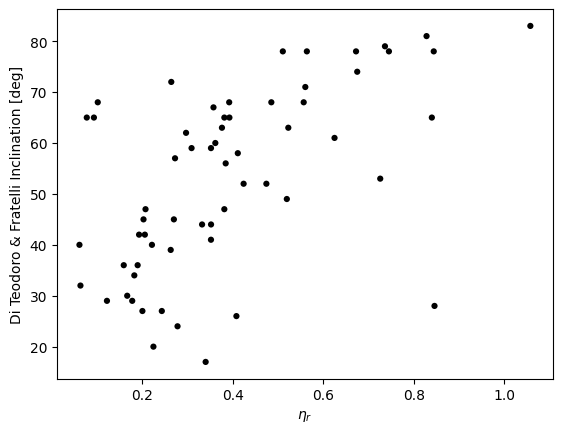

In [6]:
# check our galaxies against the reported inclinations
# could also check b/a values for these, since we are fully cross-matched now

mask = (compdf['quality_flag'] <= 3)
print(compdf.loc[mask, 'eta_r'].size)
plt.scatter(compdf.loc[mask, 'eta_r'], compdf.loc[mask, 'i_deg_DF14'], edgecolor='none',s=20,facecolor='black')
plt.xlabel('$\eta_r$')
plt.ylabel('Di Teodoro & Fratelli Inclination [deg]')